# SEURAT SCREEN

In [1]:
import pickle
import utilities as ut
import sklearn.metrics as met
from SAM import SAM
import utilities_full as ut2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
def scatter(self, projection=None, c=None, cmap='rainbow', linewidth=0.0,
            edgecolor='k', axes=None, colorbar=True, s=10, **kwargs):
    PLOTTING=True
    if (not PLOTTING):
        print("matplotlib not installed!")
    else:
        if(isinstance(projection, str)):
            try:
                dt = self.adata.obsm[projection]
            except KeyError:
                print('Please create a projection first using run_umap or'
                      'run_tsne')

        elif(projection is None):
            try:
                dt = self.adata.obsm['X_umap']
            except KeyError:
                try:
                    dt = self.adata.obsm['X_tsne']
                except KeyError:
                    print("Please create either a t-SNE or UMAP projection"
                          "first.")
                    return
        else:
            dt = projection

        if(axes is None):
            plt.figure()
            axes = plt.gca()

        if(c is None):
            plt.scatter(dt[:, 0], dt[:, 1], s=s,
                        linewidth=linewidth, edgecolor=edgecolor, **kwargs)
        else:

            if isinstance(c, str):
                try:
                    c = self.adata.obs[c].get_values()
                except KeyError:
                    0  # do nothing

            if((isinstance(c[0], str) or isinstance(c[0], np.str_)) and
               (isinstance(c, np.ndarray) or isinstance(c, list))):
                i = ut.convert_annotations(c)
                ui, ai = np.unique(i, return_index=True)
                cax = axes.scatter(dt[:,0], dt[:,1], c=i, cmap=cmap, s=s,
                                   linewidth=linewidth,
                                   edgecolor=edgecolor,
                                   **kwargs)

                if(colorbar):
                    cbar = plt.colorbar(cax, ax=axes, ticks=ui)
                    cbar.ax.set_yticklabels(c[ai])
            else:
                if not (isinstance(c, np.ndarray) or isinstance(c, list)):
                    colorbar = False
                i = c

                cax = axes.scatter(dt[:,0], dt[:,1], c=i, cmap=cmap, s=s,
                                   linewidth=linewidth,
                                   edgecolor=edgecolor,
                                   **kwargs)

                if(colorbar):
                    plt.colorbar(cax, ax=axes)
def DARMANIS(**kwargs):
    sam = SAM()
    sam.load_data('darmanis/darmanis_data.csv', **kwargs)
    sam.load_annotations('darmanis/darmanis_ann.csv')
    sam.preprocess_data()
    return sam

def WANG(**kwargs):
    sam = SAM()
    sam.load_data('final_datasets/GSE83139/wang_data_sparse.p', **kwargs)
    sam.preprocess_data(filter_genes=False,min_expression=1)
    A = pd.read_csv('final_datasets/GSE83139/wang_ann.csv',header=None,index_col=0)    
    A.index = A.index.astype("<U100")
    sam.adata.obs['ann'] = A
    sam.adata.var_names_make_unique()
    return sam

def human1(**kwargs):
    sam = SAM()
    sam.load_data('final_datasets/GSE84133_1/human1_sparse.p')
    sam.preprocess_data()
    sam.load_annotations('final_datasets/GSE84133_1/human1_ann.csv')
    return sam


def human2(**kwargs):
    sam = SAM()
    sam.load_data('final_datasets/GSE84133_2/human2_sparse.p')
    sam.preprocess_data()
    sam.load_annotations('final_datasets/GSE84133_2/human2_ann.csv')
    return sam

def human3(**kwargs):
    sam = SAM()
    sam.load_data('final_datasets/GSE84133_3/human3_sparse.p')
    sam.preprocess_data()
    sam.load_annotations('final_datasets/GSE84133_3/human3_ann.csv')
    return sam
def human4(**kwargs):
    sam = SAM()
    sam.load_data('final_datasets/GSE84133_4/human4_sparse.p')
    sam.preprocess_data()
    sam.load_annotations('final_datasets/GSE84133_4/human4_ann.csv')
    return sam


def KOH(**kwargs):
    sam = SAM()
    sam.load_data('final_datasets/SRP073808/SRP073808_data.csv',
                            **kwargs)
    sam.load_annotations('final_datasets/SRP073808/SRP073808_ann.csv')
    sam.preprocess_data()
    return sam


def SEGER(**kwargs):
    sam=SAM()
    sam.load_data('final_datasets/seger/seger_sparse.p')
    sam.load_annotations('final_datasets/seger/seger_ann.csv')
    sam.preprocess_data()
    return sam


def MURARO(**kwargs):
    sam=SAM()
    sam.load_data('final_datasets/muraro/muraro_sparse.p')
    sam.load_annotations('final_datasets/muraro/muraro_ann.csv')
    sam.preprocess_data()
    return sam
def nmi(x, y):
    return met.adjusted_mutual_info_score(x, y, average_method='arithmetic')

def SEURAT(adata,npcs,ngenes):
    pca,_,_,_ = ut2.do_SEURAT4(adata.copy(),npcs=npcs,NN=ngenes)
    cl = hdbknn(pca)
    return pca,cl
    #RECORD['('+str(npcs)+','+str(ngenes)+')'] = cl
def ari(x, y):
    return met.adjusted_rand_score(x, y)

def hdbknn(X):
    import hdbscan
    k=20

    hdb = hdbscan.HDBSCAN(metric='euclidean')

    cl = hdb.fit_predict(Normalizer().fit_transform(X))

    idx0 = np.where(cl != -1)[0]
    idx1 = np.where(cl == -1)[0]
    if idx1.size > 0 and idx0.size > 0:
        xcmap = ut.generate_euclidean_map(X[idx0, :], X[idx1, :])
        knn = np.argsort(xcmap.T, axis=1)[:, :k]
        nnm = np.zeros(xcmap.shape).T
        nnm[np.tile(np.arange(knn.shape[0])[:, None],
                    (1, knn.shape[1])).flatten(),
            knn.flatten()] = 1
        nnmc = np.zeros((nnm.shape[0], cl.max() + 1))
        for i in range(cl.max() + 1):
            nnmc[:, i] = nnm[:, cl[idx0] == i].sum(1)

        cl[idx1] = np.argmax(nnmc, axis=1)

    return cl
%load_ext autoreload
%autoreload -2

In [2]:
preproc = ['Normalizer','Normalizer']+['StandardScaler',]*4+['Normalizer',]*3
funcs = [DARMANIS(),WANG(),human1(),human2(),human3(),human4(),KOH(),SEGER(),MURARO()]
names = ['DARMANIS','WANG','human1','human2','human3','human4','KOH','SEGER','MURARO']
"""
for i in range(len(funcs)):
    funcs[i].run(preprocessing=preproc[i])
    funcs[i].hdbknn_clustering(npcs=15)
    funcs[i].ari = ari(funcs[i].adata.obs['hdbknn_clusters'],funcs[i].adata.obs.iloc[:,0])
    funcs[i].nmi = nmi(funcs[i].adata.obs['hdbknn_clusters'],funcs[i].adata.obs.iloc[:,0])
    print('--- ' + str(i) + ' ---')
    print(funcs[i].ari)
    print(funcs[i].nmi)"""

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Converting sparse matrix to csr format...
Converting sparse matrix to csr format...


"\nfor i in range(len(funcs)):\n    funcs[i].run(preprocessing=preproc[i])\n    funcs[i].hdbknn_clustering(npcs=15)\n    funcs[i].ari = ari(funcs[i].adata.obs['hdbknn_clusters'],funcs[i].adata.obs.iloc[:,0])\n    funcs[i].nmi = nmi(funcs[i].adata.obs['hdbknn_clusters'],funcs[i].adata.obs.iloc[:,0])\n    print('--- ' + str(i) + ' ---')\n    print(funcs[i].ari)\n    print(funcs[i].nmi)"

In [3]:
ngenes = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,-1]
npcs = [6,10,15,20,25,30,35,40,45,50]

RECORDd={}
for I in range(1):
    RECORD = np.zeros((len(ngenes),len(npcs)))
    for i,ng in enumerate(ngenes):
        for j,npc in enumerate(npcs):
            print(i)
            print(j)
            _,cl = SEURAT(funcs[I].adata_raw,npc,ng)
            RECORD[i,j] = ari(funcs[I].adata.obs.iloc[:,0],cl)
    RECORDd[names[I]] = RECORD
    #pickle.dump(RECORDd,open('paper_scripts/seurat_param_sweep_bigger_fixed.p','wb'))

0
0
500
0
1
500
0
2
500
0
3
500
0
4
500
0
5
500
0
6
500
0
7
500
0
8
500
0
9
500
1
0
1000
1
1
1000
1
2
1000
1
3
1000
1
4
1000
1
5
1000
1
6
1000
1
7
1000
1
8
1000
1
9
1000
2
0
1500
2
1
1500
2
2
1500
2
3
1500
2
4
1500
2
5
1500
2
6
1500
2
7
1500
2
8
1500
2
9
1500
3
0
2000
3
1
2000
3
2
2000
3
3
2000
3
4
2000
3
5
2000
3
6
2000
3
7
2000
3
8
2000
3
9
2000
4
0
2500
4
1
2500
4
2
2500
4
3
2500
4
4
2500
4
5
2500
4
6
2500
4
7
2500
4
8
2500
4
9
2500
5
0
3000
5
1
3000
5
2
3000
5
3
3000
5
4
3000
5
5
3000
5
6
3000
5
7
3000
5
8
3000
5
9
3000
6
0
3500
6
1
3500
6
2
3500
6
3
3500
6
4
3500
6
5
3500
6
6
3500
6
7
3500
6
8
3500
6
9
3500
7
0
4000
7
1
4000
7
2
4000
7
3
4000
7
4
4000
7
5
4000
7
6
4000
7
7
4000
7
8
4000
7
9
4000
8
0
4500
8
1
4500
8
2
4500
8
3
4500
8
4
4500
8
5
4500
8
6
4500
8
7
4500
8
8
4500
8
9
4500
9
0
5000
9
1
5000
9
2
5000
9
3
5000
9
4
5000
9
5
5000
9
6
5000
9
7
5000
9
8
5000
9
9
5000
10
0
5500
10
1
5500
10
2
5500
10
3
5500
10
4
5500
10
5
5500
10
6
5500
10
7
5500
10
8
5500
10
9
5500
11
0
6000


KeyboardInterrupt: 

DARMANIS
0.794148656139229
0.9034866773001611
WANG
0.3890690408050732
0.8972597183224579
human1
0.970835776399484
0.9590221521065373
human2
0.9657754417656713
0.963385776527892
human3
0.966371650460688
0.9597750782188339
human4
0.9294101159518727
0.9263460681866745
KOH
0.7821302028690897
0.8460575418332903
SEGER
0.91687778140627
0.9272701021459184
MURARO
0.9124265708531468
0.91839500507273


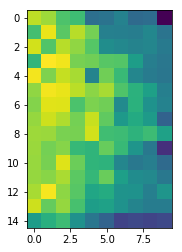

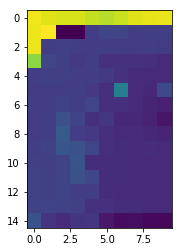

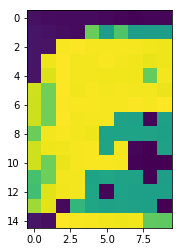

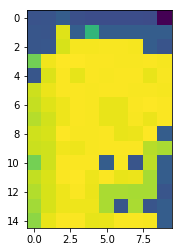

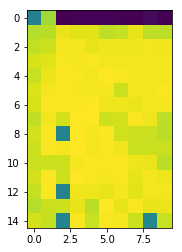

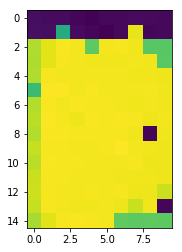

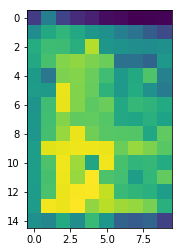

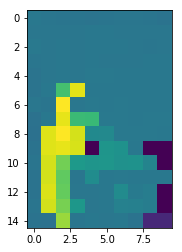

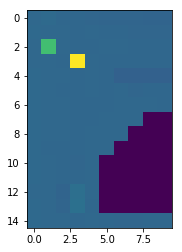

In [5]:
for i in range(len(funcs)):
    plt.figure(); plt.imshow(RECORDd[names[i]])
    print(names[i])
    print(RECORDd[names[i]].max())
    print(funcs[i].ari)